# Lesson 13: 빅데이터와 시각화 – 고차원 자료의 시각화

최규빈  
2023-07-26

<a href="https://colab.research.google.com/github/guebin/PP2024WIN/blob/main/posts/Day3/ls13.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# Imports

In [67]:
import pandas as pd
from plotnine import *

# Plotnine

아래는 FIFA22의 자료를 불러오는 코드이다.

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')
df.head()

포지션별로 선수들의 능력치(`ShotPower`,`SlidingTackle`)와 급여(`Wage`)를
시각화하고 싶다. 아래의 세부지침에 맞추어 포지션별 `ShotPower`와
`SlidingTackle`의 산점도를 그려라.

In [13]:
df.Position

***세부지침***

**A**. Column의 이름에서 공백을 제거하라.

**B**. 결측치가 50%이상인 컬럼을 찾고 이를 제거하라. 그 뒤에
`.dropna()`를 사용하여 결측치가 포함된 행을 제거하라.

**C**. `position_dict`를 이용하여 `df.Position`을 적절하게 변환하라.
변환된 값을 `df.Position`에 저장하라.

In [6]:
position_dict = {
    'GOALKEEPER':{'GK'},
    'DEFENDER':{'CB','RCB','LCB','RB','LB','RWB','LWB'},
    'MIDFIELDER':{'CM','RCM','LCM','CDM','RDM','LDM','CAM','RAM','LAM','RM','LM'},
    'FORWARD':{'ST','CF','RF','LF','RW','LW','RS','LS'},
    'SUB':{'SUB'},
    'RES':{'RES'}
}
position_dict

**D**. `df.Wage`를 적절하게 변환하라.

**E**. `Position==“DEFENDER”` or `Position==“FORWARD”`에 해당하는
관측치를 고른 뒤 x축에 `ShotPower`, y축에 `SlidingTackle`을 시각화하라.
이때 `Position`은 color로 구분하고 `Wage`는 size와 alpha로 구분하라.

— 시각화예시 —

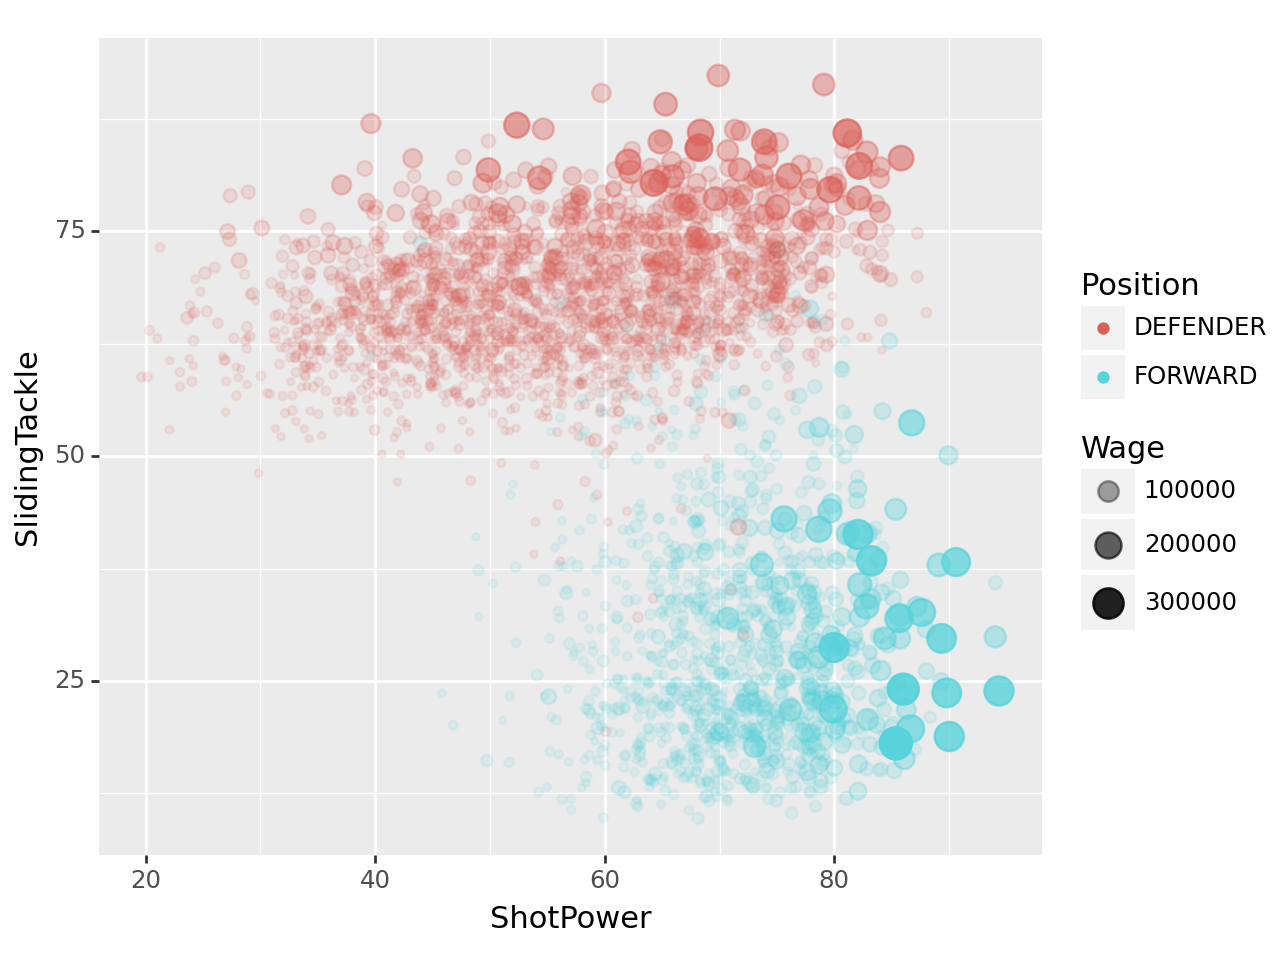

In [18]:
#

## A. 열의 이름에서 공백제거

In [18]:
df.columns = [l.replace(' ','') for l in df.columns]
df

## B. 결측치제거

In [36]:
df = df.loc[:,df.isna().mean(axis=0)<0.5].dropna()
df

## C. Position 칼럼의 변환

In [44]:
position = df.Position.str.split(">").str[-1]
position

In [53]:
df = df.assign(Position = [k for i in position for k,v in position_dict.items() if i in v])
df 

## D. Wage 칼럼의 변환

In [62]:
df = df.assign(Wage = [int(l.replace('€','').replace('K','000')) for l in df.Wage]) 

## E. 시각화

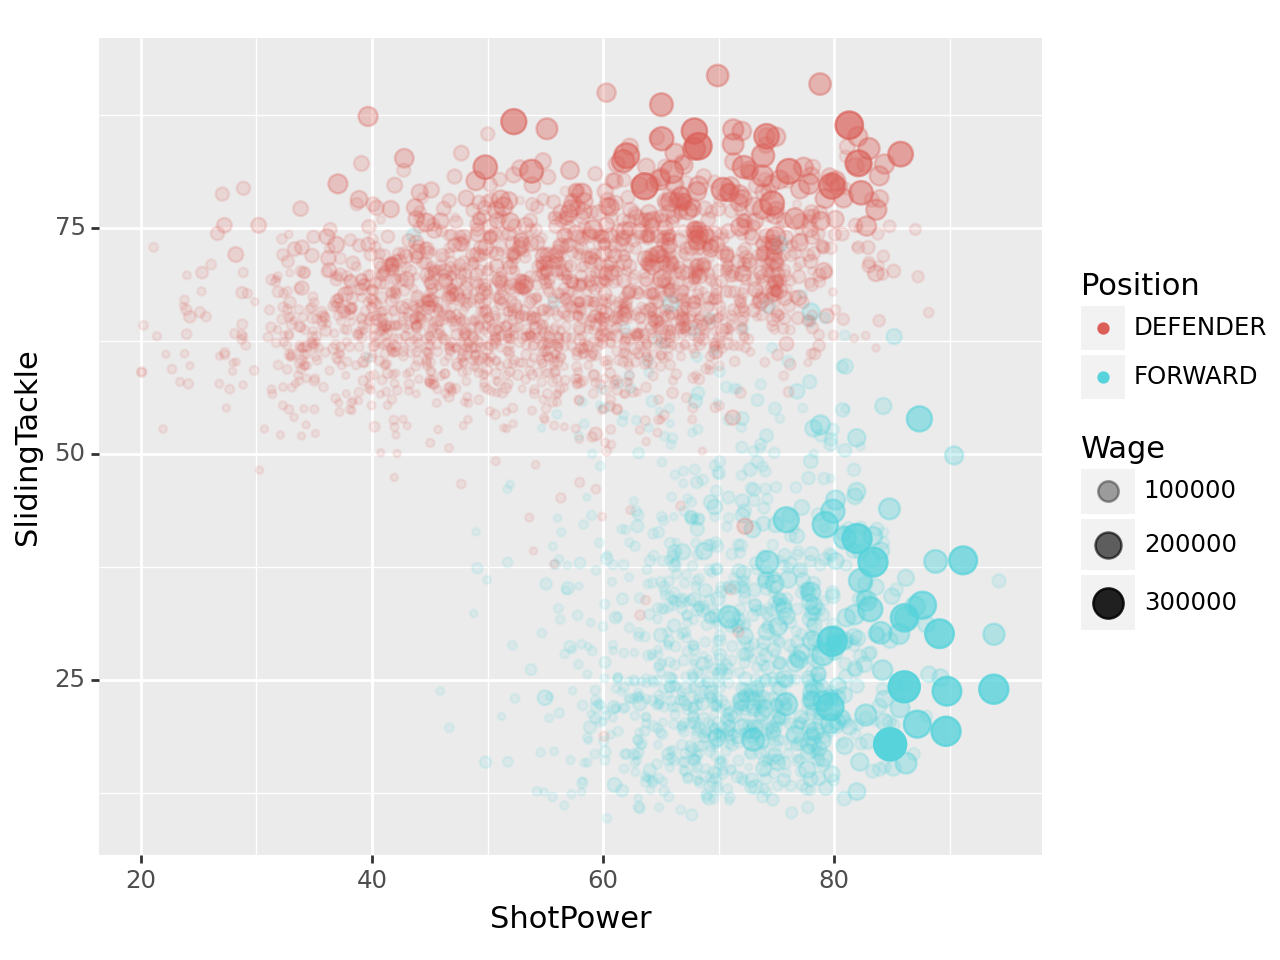

In [94]:
fig = ggplot(df[(df.Position == 'FORWARD') | (df.Position == 'DEFENDER')])
point = geom_point(aes(x='ShotPower',y='SlidingTackle',color='Position',size='Wage',alpha='Wage'),position='jitter')
fig+point